In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [10]:
df = pd.read_csv("Data_processed/data.csv")

In [11]:
df.head()

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,product_length_cm,product_height_cm,product_width_cm,seller_lat,seller_lng,order_time,recency,amount,frequency,product_category
0,-23.499063,-46.767939,1.0,89.80,24.94,1,0,8,114.74,1,...,46.0,39.0,22.0,-23.049552,-47.837621,5.0,287,89.800000,1,37
1,-20.794069,-49.365081,1.0,84.80,24.90,1,0,2,109.70,4,...,46.0,39.0,22.0,-23.049552,-47.837621,8.0,361,84.800000,1,37
2,-23.009475,-43.334530,1.0,89.80,18.00,1,0,2,107.80,4,...,46.0,39.0,22.0,-23.049552,-47.837621,25.0,316,89.800000,1,37
3,-23.590310,-46.723572,1.0,84.80,14.04,1,0,3,291.47,4,...,46.0,39.0,22.0,-23.049552,-47.837621,18.0,372,83.896667,3,37
4,-23.590310,-46.723572,1.0,96.99,9.36,1,0,3,291.47,4,...,48.0,27.0,18.0,-23.049552,-47.837621,18.0,372,83.896667,3,37


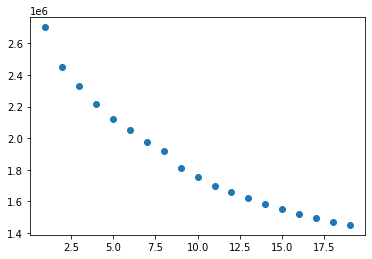

In [12]:
x = []
y = []
for n in range(1,20):
    x.append(n)
    estimator = make_pipeline(StandardScaler(),PCA(n_components=0.99), KMeans(n_clusters=n, random_state=1))
    estimator.fit(df)
    y.append(int(estimator.named_steps['kmeans'].inertia_))

plt.scatter(x, y)
plt.show()

Loi des coudes => n_cluster optimal = 7

## Visualisation des Clusters avec PCA

### PCA

In [13]:
pca = PCA(n_components=0.95)
df_scaled = StandardScaler().fit_transform(df)
pca.fit(df_scaled)
pca.explained_variance_ratio_

array([0.16360792, 0.08217297, 0.07314623, 0.06645247, 0.05413793,
       0.05228903, 0.0517117 , 0.0478024 , 0.04218443, 0.0419482 ,
       0.04013208, 0.03639209, 0.03610179, 0.03316324, 0.03144519,
       0.02573789, 0.02272185, 0.02222856, 0.01900314, 0.01896644])

Text(0, 0.5, 'Explained variance')

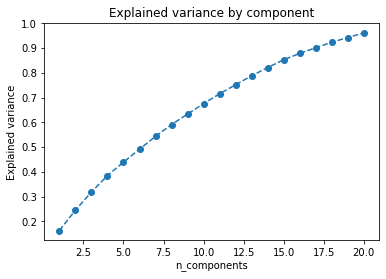

In [14]:
plt.plot(range(1,21),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained variance by component")
plt.xlabel("n_components")
plt.ylabel("Explained variance")

In [15]:
scores = pca.transform(df_scaled)
scores

### KMeans

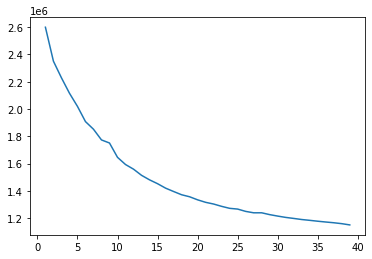

In [18]:
x = []
y = []
for i in range(1,40):
    k_means_pca = KMeans(n_clusters=i, random_state=1)
    k_means_pca.fit(scores)
    x.append(i)
    y.append(k_means_pca.inertia_)
plt.plot(x, y)

In [19]:
k_means_pca = KMeans(n_clusters=10, random_state=1)
k_means_pca.fit(scores)

KMeans(n_clusters=10, random_state=1)

### Dataframe des données avec clusters et dimensions PCA

In [22]:
df_k_means = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores)], axis=1)
df_k_means.columns.values[-20:] = ["Component 1", "Component 2", "Component 3", "Component 4", "Component 5",
                                    "Component 6", "Component 7", "Component 8", "Component 9", "Component 10",
                                    "Component 11", "Component 12", "Component 13", "Component 14", "Component 15",
                                    "Component 16", "Component 17", "Component 18", "Component 19", "Component 20"]
df_k_means["Segment KMeans PCA"] = k_means_pca.labels_
df_k_means

,customer_lat,customer_lng,order_status,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,Segment KMeans PCA
0,-23.499063,-46.767939,1.0,89.80,24.94,1,0,8,114.74,1,...,-0.407581,-1.264103,-0.329392,-0.265576,-0.198149,-0.982476,-0.018372,-0.574923,0.208580,0
1,-20.794069,-49.365081,1.0,84.80,24.90,1,0,2,109.70,4,...,-0.443978,-1.132406,-0.039623,0.599968,0.278465,0.663353,-0.292735,-0.152308,0.384347,0
2,-23.009475,-43.334530,1.0,89.80,18.00,1,0,2,107.80,4,...,-0.552393,-1.170267,-0.144105,-0.151627,-1.368674,0.382174,0.246105,-0.563001,0.205345,0
3,-23.590310,-46.723572,1.0,84.80,14.04,1,0,3,291.47,4,...,-0.492940,-1.160252,-0.075855,0.199813,-0.915827,0.516935,-0.033346,-0.106819,0.882027,0
4,-23.590310,-46.723572,1.0,96.99,9.36,1,0,3,291.47,4,...,-0.219976,-0.489071,-0.292714,-0.025957,-0.753474,0.549055,0.077707,-0.461700,0.991138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112636,-1.461061,-48.483919,1.0,64.99,19.37,1,0,1,168.72,5,...,0.159420,-0.491440,0.075645,-0.778598,1.230238,1.049961,-1.720441,1.248284,0.045874,9
112637,-21.772062,-43.383411,1.0,21.99,18.23,1,0,1,40.22,5,...,0.557565,0.678290,0.767637,0.314016,-0.278852,0.533526,-0.312119,-0.493954,-0.306755,4
112638,-23.497740,-46.703784,1.0,23.99,7.43,1,1,1,31.42,5,...,-0.373817,-0.347920,0.666189,0.126329,-0.401173,-0.482235,-0.628008,-0.091660,0.047161,1
112639,-23.658946,-46.561991,1.0,22.99,7.39,1,0,1,30.38,5,...,1.544500,1.188329,1.192686,-0.792052,-0.328203,0.348717,0.023243,-0.071717,-0.396252,4


### Visualisations

In [ ]:
for i in range(3):
    x = df_k_means[f'Component {2*i}']
    y = df_k_means[f'Component {2*i+1}']
    sns